<a href="https://colab.research.google.com/github/neha07kumari/TSF_DataScience/blob/main/Tsf_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**

# **Prediction using Decision Tree Algorithm (Iris Dataset)**

# **-NEHA KUMARI**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/My Drive/datasets'

In [ ]:
#reading the data
df =pd.read_csv(path+'/Iris.csv',engine='python')


In [ ]:
#checking the first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking the number of rows and columns in the dataset respectively.
df.shape


(150, 6)

In [ ]:
#checking the statistical data of numerical columns in dataset.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


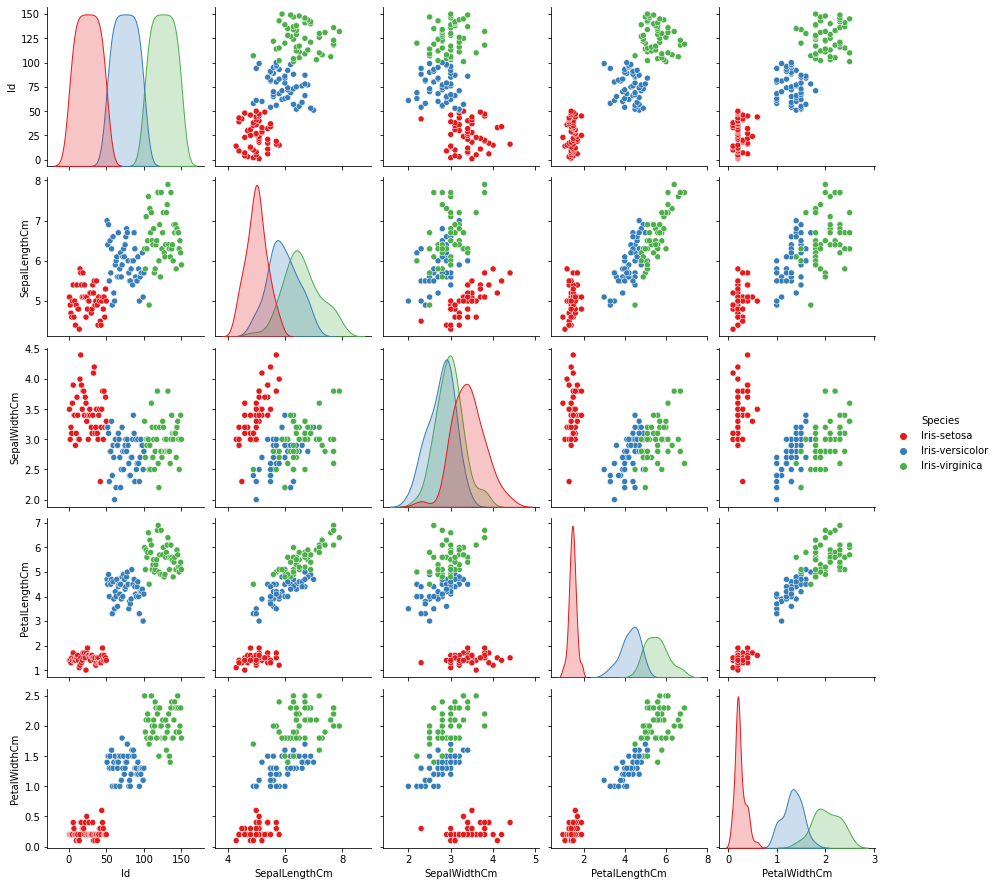

In [ ]:
#plotting the pairplot for every feature to know the relationship between two features setting hue as species.
#It tells us which species are more separarted from each other.
sns.pairplot(df,hue="Species",palette='Set1')

In [ ]:
#checking the datatypes and also if there is any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# **Feature Engineering**

In [ ]:
#function which is used to map the values of the species column from object to integer which is further used to classify all the three species.
def convertor(species):
  if species=='Iris-virginica':
    return 2;
  elif species=='Iris-setosa':
    return 0;
  else:
    return 1;

In [ ]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
#using apply method on the column species of our original dataset which will map the values in species column according to the values which are defined in the converter function.
#defining a new feature to our original dataset consisiting of the mapped values for species column and drop the species column from the original dataset. Basically it is a substitue function for get_dummies method.
df["target"] = df["Species"].apply(convertor)
df_new = df.drop(["Species"],axis=1)
df_new.head()
df_new["target"].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
#checking the head of new dataset to which we have done some feature engineering
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


**Separating the Dependent and Independent variables.**

In [ ]:
#setting the variable x and target variable y from new dataset
y = df_new["target"]
y = np.array(y)
x = df_new.drop(["target","Id"],axis=1)
x = np.array(x)
x.shape,y.shape

((150, 4), (150,))

# **Building the Model**

In [ ]:
#importing train_test_split and splitting the data into train and test by keeping train data as 80% and test datat as 20% with random state of 42.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [ ]:
#importing DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#making the instance of Decision tree by calling DecisionTreeClassifier() without changing any parameter
DTC = DecisionTreeClassifier()

In [ ]:
#getting all default parameters of DecisionTreeClassifier().
DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#fitting our training data
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#predicting values from classifier model based on training data .
predict_train = DTC.predict(X_train)
predict_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
#getting the dataframe for comparison of the predicted train value and actual train values.
data = pd.DataFrame({"predicted_value_train":predict_train,"actual_value_train":y_train})
data.head()

,predicted_value_train,actual_value_train
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [ ]:
#accuracy
DTC.score(X_train,y_train)

1.0

# **Testing our model on the unseen(test) data**

In [ ]:
#predicting the values from the classifier model based on testing data.
predict_test = DTC.predict(X_test)
#accuracy
DTC.score(X_test,y_test)

1.0

**Comparison of the predicted test values with actual test values.**

In [ ]:
dt = pd.DataFrame({"predicted_value_test":predict_test,"actual_value_test":y_test})
dt.head()

,predicted_value_test,actual_value_test
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [ ]:
#total predicted values from the dataaset
y_predict = DTC.predict(x)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **Evaluation**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(predict_test,y_test))
print(classification_report(predict_test,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_predict,df_new["target"]))
print(classification_report(y_predict,df_new["target"]))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# **Visualization of our results.**

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

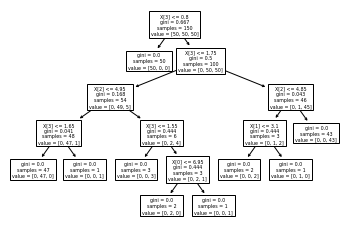

In [ ]:
#first way of plotting
#visualizing a decision tree by importing tree from sklearn and plotting the tree on our data
from sklearn import tree
tree.plot_tree(DTC.fit(x,y))

In [ ]:
#second way of plotting
from sklearn.tree import export_graphviz

In [ ]:
#exporting our fitted decision tree as a .dot file , which is the standard extension for graphviz files.
FEATURE_NAMES = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
export_graphviz(DTC, 'tree.dot', feature_names=FEATURE_NAMES)

In [ ]:
#converting .dot file to .png file
! dot -Tpng tree.dot -o tree.png

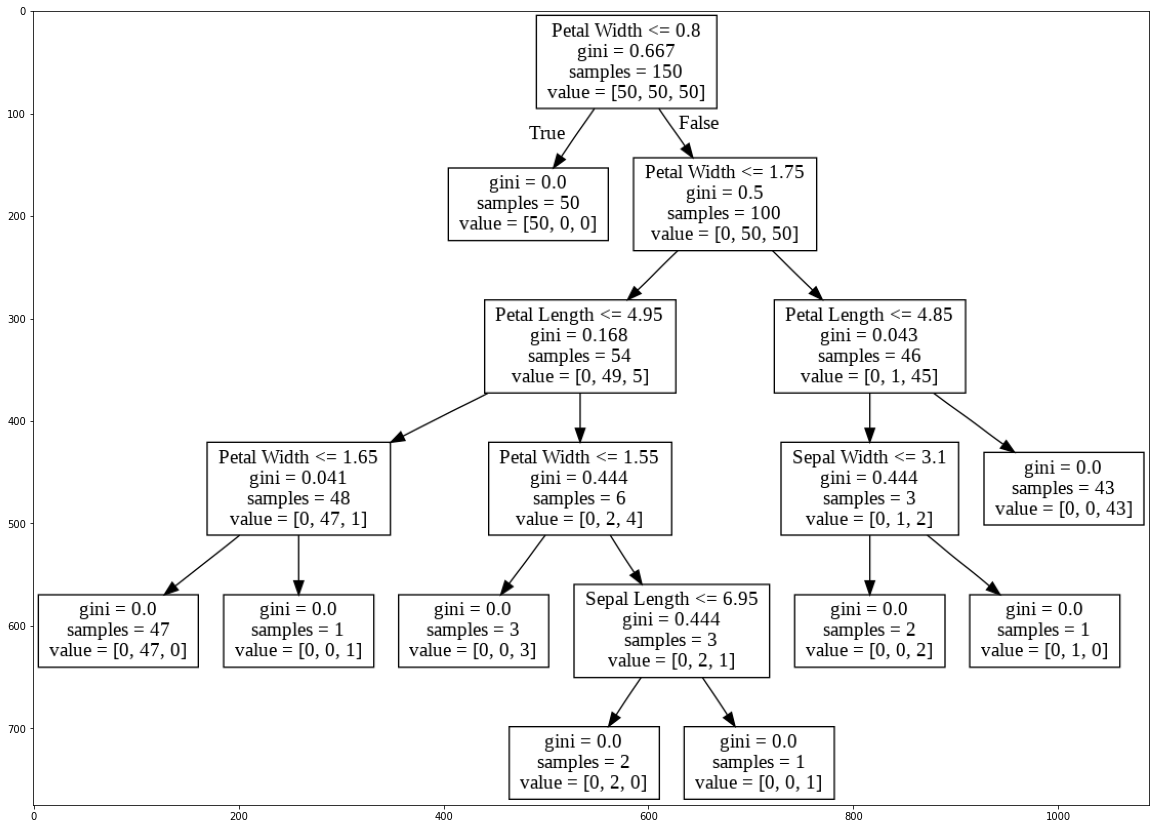

In [ ]:
#displaying the tree.png file
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20,20))
plt.imshow(img)

# **Predicting the Species if any new values of it's features are given.**

In [ ]:
#predicting new values
l=[]
l = list(map(float,input("Enter the 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' respectively : ").split()))
if DTC.predict([l])==0:
  print("The species with these feature's length belong to {} ".format("Iris-setosa"))
if DTC.predict([l])==1:
  print("The species with these feature's length belong to {} ".format("Iris-versicolor"))
if DTC.predict([l])==2:
  print("The species with these feature's length belong to {} ".format("Iris-virginica"))


Enter the 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' respectively : 5.1 3.5 1.4 0.2
The species with these feature's length belong to Iris-setosa 
